In [49]:
import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
#import missingno as msno
#warnings.filterwarnings('ignore')

In [50]:
from datetime import datetime, timedelta
from math import sqrt

In [51]:
#from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [52]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
#matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
import scipy.stats as stats


In [54]:
import statsmodels.api as sm
from datetime import date, datetime, time

In [55]:
#Input and Read Data
#Input
df_bankdata=pd.read_csv('bank-full.csv',delimiter=';')

In [56]:
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
df_bankdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
df_bankdata.isnull().sum().sort_values(ascending=False )

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [59]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


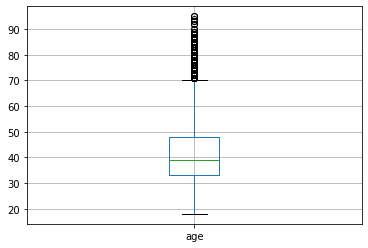

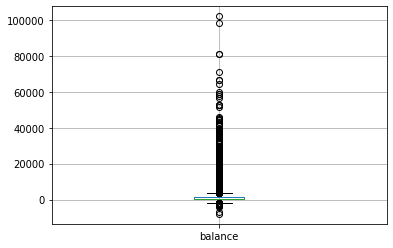

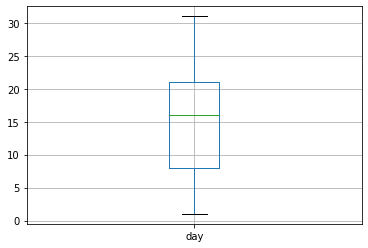

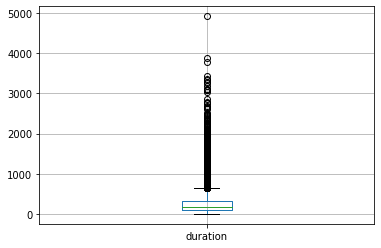

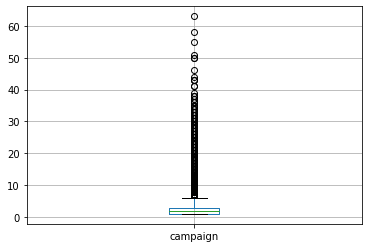

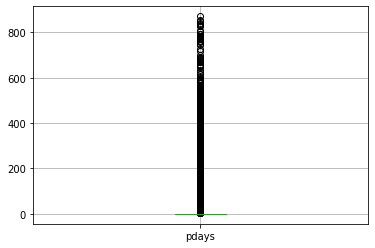

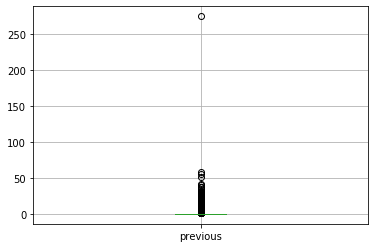

In [60]:
Numerical_column = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
for i in (Numerical_column):
    df_bankdata.boxplot(column=[i])
    plt.show()

In [61]:
#Check to see if there are any null values 
df_bankdata.isnull().sum().sort_values(ascending=False)

y            0
loan         0
job          0
marital      0
education    0
default      0
balance      0
housing      0
contact      0
poutcome     0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
age          0
dtype: int64

In [62]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age


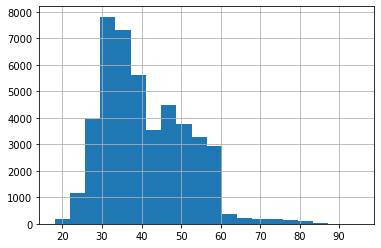

balance


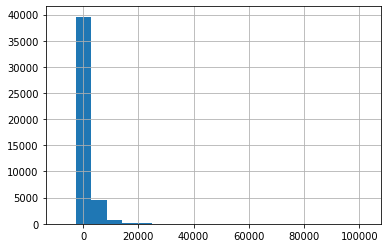

day


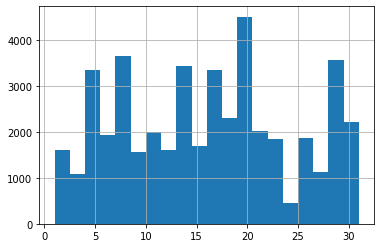

duration


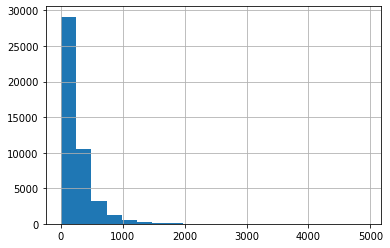

campaign


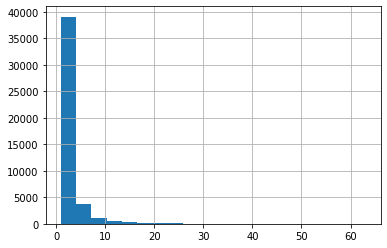

pdays


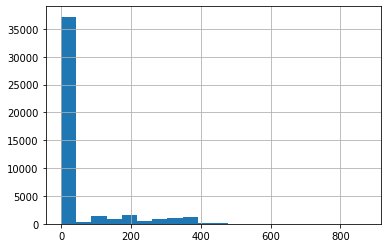

previous


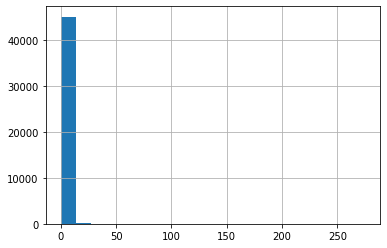

In [63]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [64]:
df_bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [65]:
for num in (Numerical_column):
    print(num + ' median', df_bankdata[num].quantile(0.50)) 
    print(num + ' outlier', df_bankdata[num].quantile(0.95)) 
    df_bankdata[num] = np.where(df_bankdata[num] >= df_bankdata[num].quantile(0.95), df_bankdata[num].quantile(0.50) , df_bankdata[num])
    df_bankdata.describe()

age median 39.0
age outlier 59.0
balance median 448.0
balance outlier 5768.0
day median 16.0
day outlier 29.0
duration median 180.0
duration outlier 751.0
campaign median 2.0
campaign outlier 8.0
pdays median -1.0
pdays outlier 317.0
previous median 0.0
previous outlier 3.0


In [66]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,39.514167,835.274336,14.606401,212.857889,2.202429,21.571564,0.154476
std,8.811742,1188.795967,7.130690,153.400688,1.412550,63.733388,0.473055
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,46.000000,1125.500000,20.000000,280.000000,3.000000,-1.000000,0.000000
max,58.000000,5766.000000,28.000000,750.000000,7.000000,316.000000,2.000000


In [67]:
for num in (Numerical_column):
    #print("Log"+num)
    df_bankdata["Log"+num] = df_bankdata[num].map(lambda i: np.log(i) if i > 0 else 0) 
    print(num, df_bankdata[num].skew())
    print("Log"+num, df_bankdata["Log"+num].skew())

age 0.32218529659773626
Logage -0.10255844307349565
balance 1.823543994377086
Logbalance -0.9877824236498287
day 0.0023710776721122067
Logday -1.214030394196237
duration 1.2547885638149134
Logduration -0.90843017861458
campaign 1.4371994813929192
Logcampaign 0.4340545133997517
pdays 2.8648302400853383
Logpdays 2.2416675354295603
previous 3.0851540207342536
Logprevious 4.303231052527699


In [68]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,39.514167,835.274336,14.606401,212.857889,2.202429,21.571564,0.154476,3.651610,5.151429,2.507670,5.074416,0.615173,0.658469,0.032288
std,8.811742,1188.795967,7.130690,153.400688,1.412550,63.733388,0.473055,0.224992,2.661126,0.670130,0.837254,0.574984,1.706395,0.146076
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.496508,4.276666,2.079442,4.634729,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.663562,6.104793,2.772589,5.192957,0.693147,0.000000,0.000000
75%,46.000000,1125.500000,20.000000,280.000000,3.000000,-1.000000,0.000000,3.828641,7.025983,2.995732,5.634790,1.098612,0.000000,0.000000
max,58.000000,5766.000000,28.000000,750.000000,7.000000,316.000000,2.000000,4.060443,8.659734,3.332205,6.620073,1.945910,5.755742,0.693147
